In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
housing = pd.read_csv("./housing.csv")
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
from sklearn.model_selection import train_test_split
train, test  = train_test_split(housing,test_size=0.2,random_state=42)
n_train = train.shape[0]
n_test = test.shape[0]
y = train['median_house_value'].values
data = pd.concat((train,test)).reset_index(drop = True)
data.drop(['longitude','latitude'],axis=1,inplace = True)


<ipython-input-19-53173786a991>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='coolwarm')


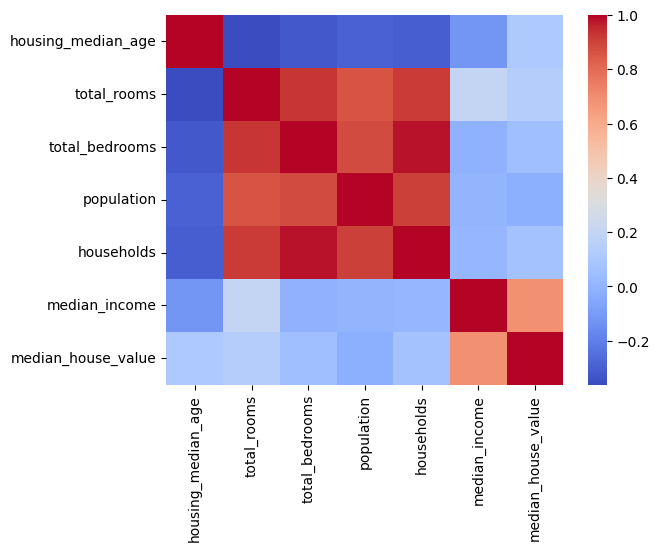

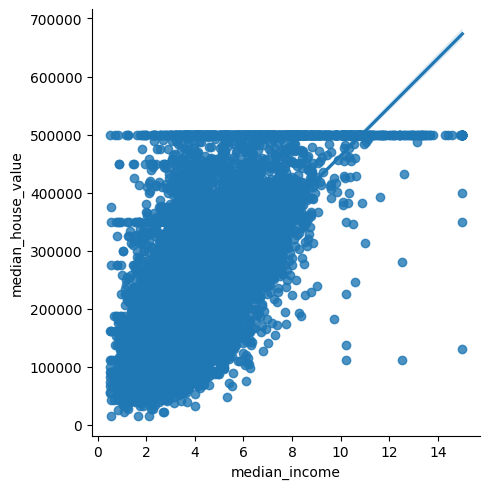

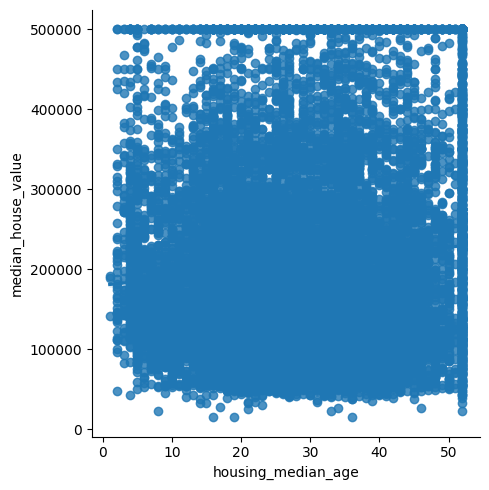

In [ ]:
plt.figure()
sns.heatmap(data.corr(),cmap='coolwarm')
plt.show()
sns.lmplot(x='median_income',y='median_house_value',data=train)
sns.lmplot(x='housing_median_age',y='median_house_value',data=train)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

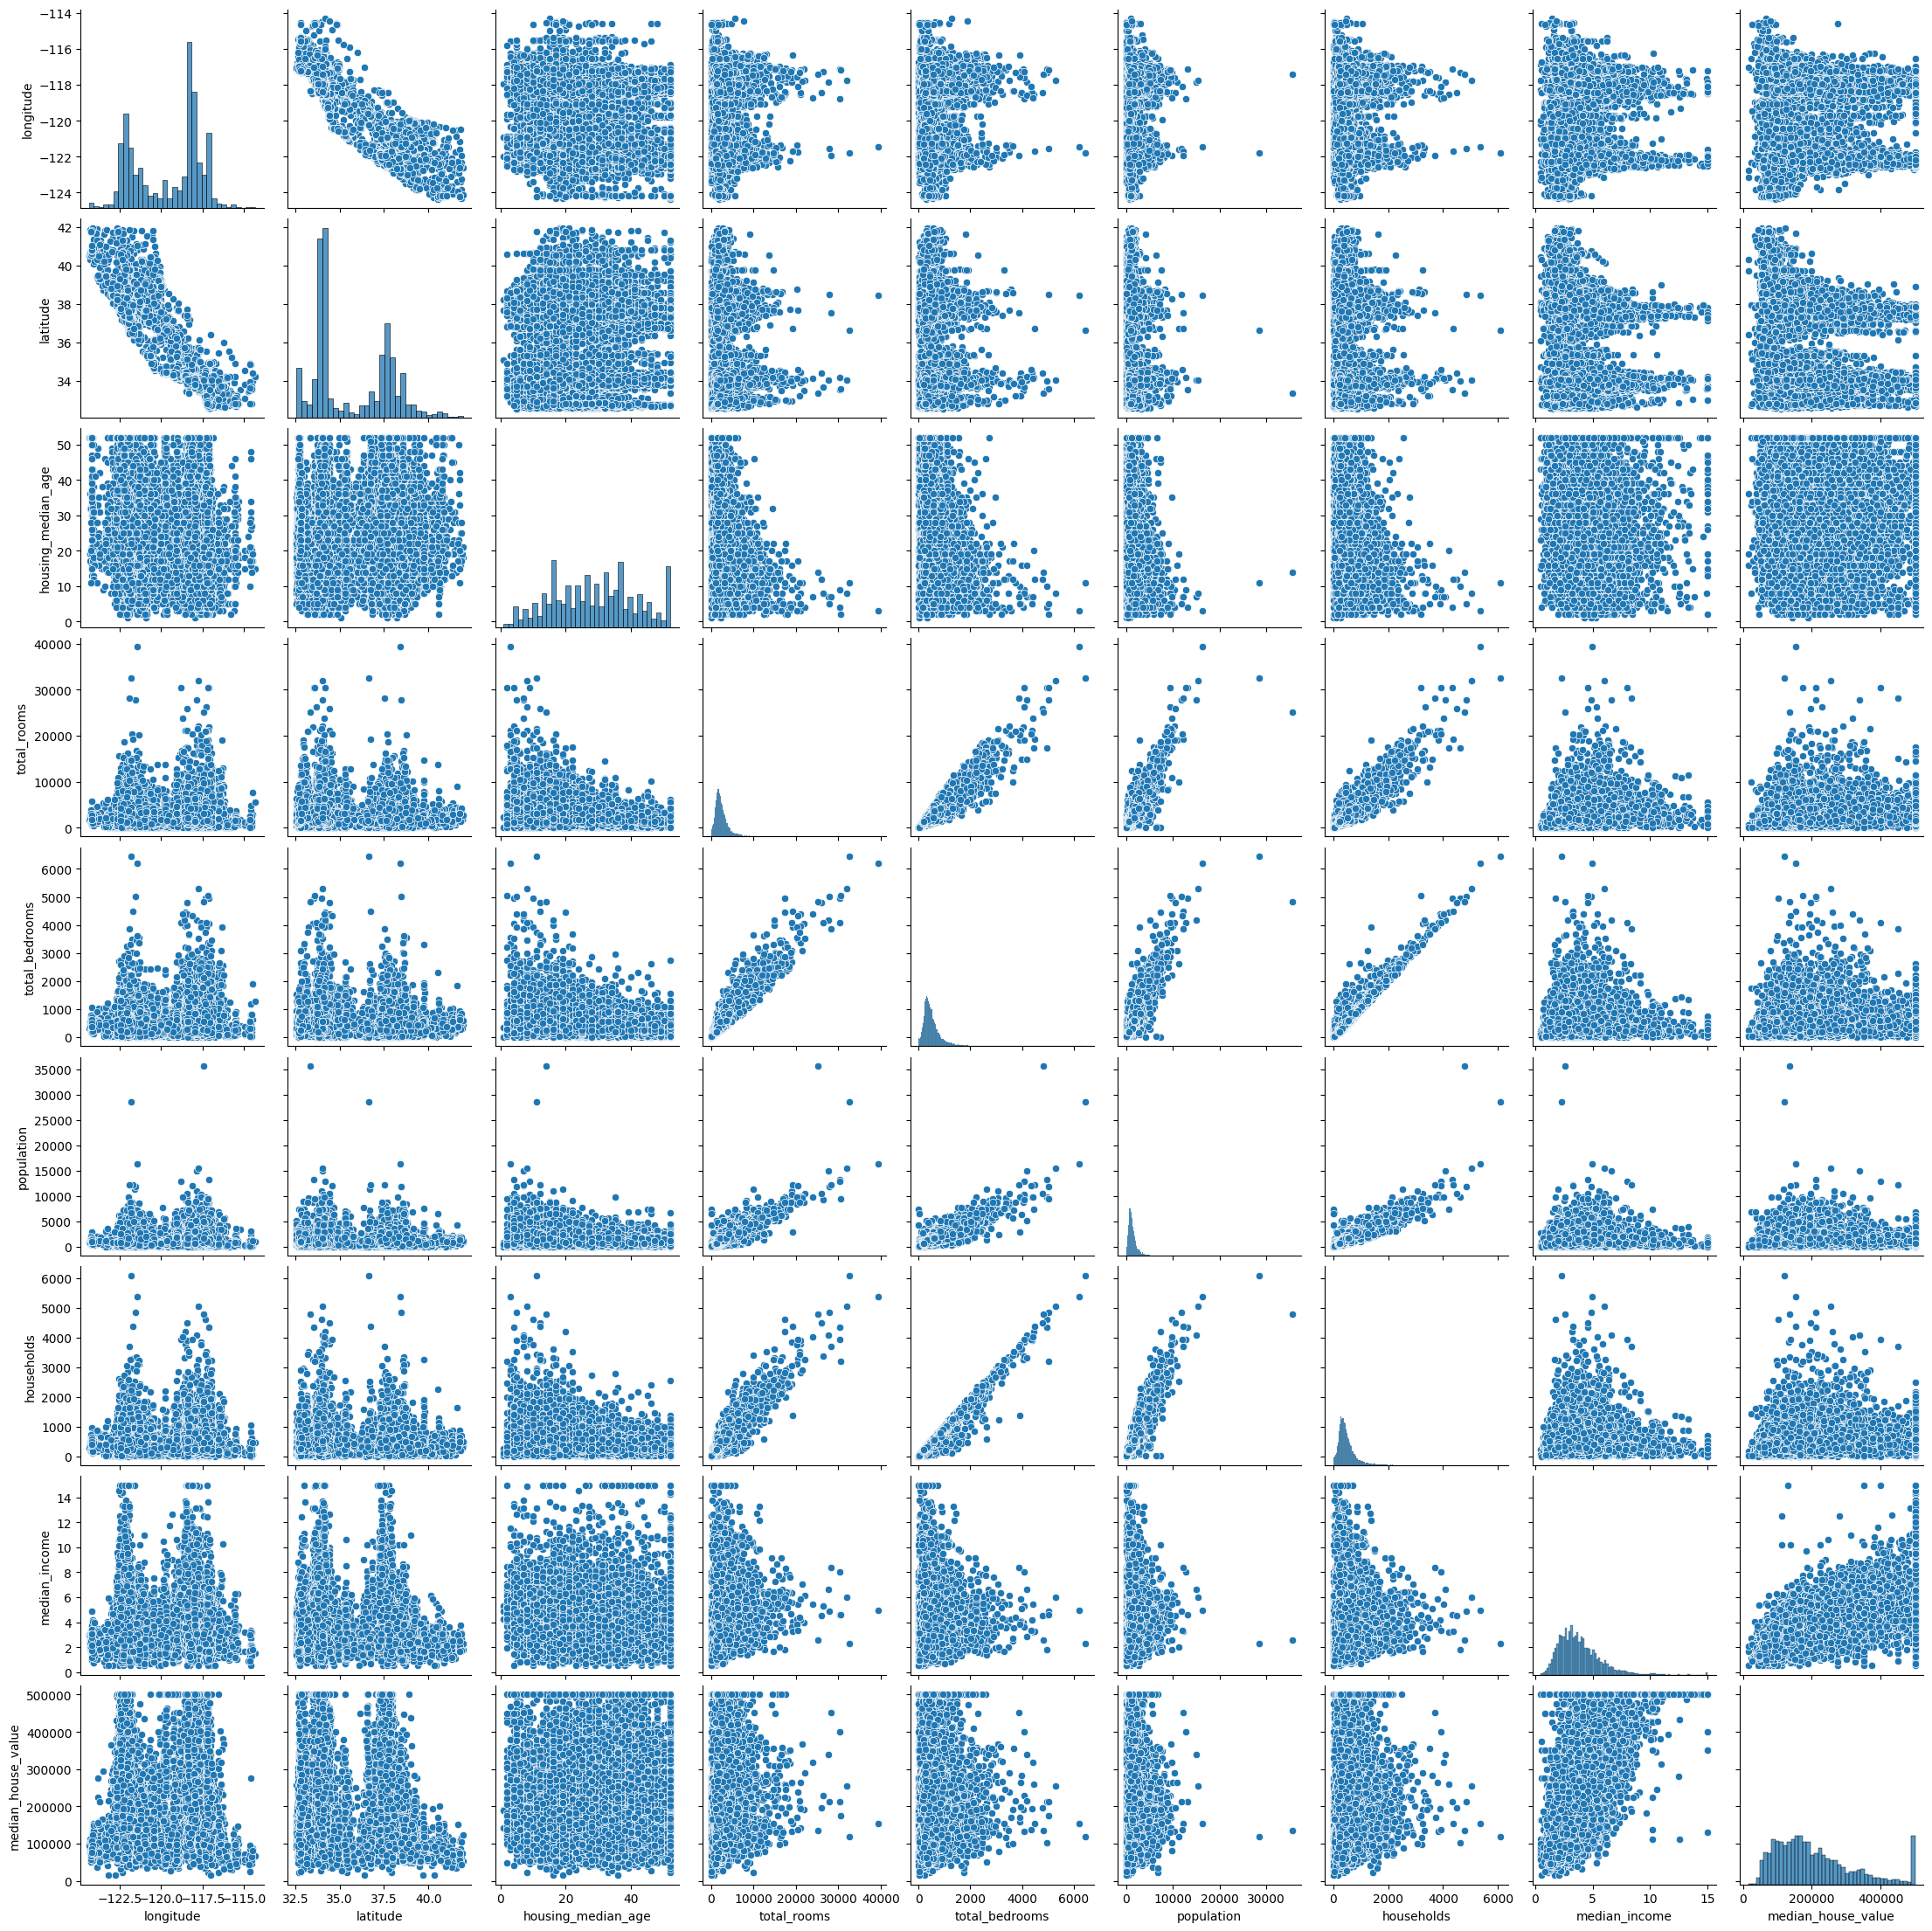

In [ ]:
sns.pairplot(train,palette='rainbow')

In [ ]:
data = data[['total_rooms','total_bedrooms','housing_median_age','median_income','population','households']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         20640 non-null  float64
 1   total_bedrooms      20433 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   median_income       20640 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
dtypes: float64(6)
memory usage: 967.6 KB


In [ ]:
data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())

data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

data['housing_median_age'] = data['housing_median_age'].fillna(data['total_bedrooms'].mean())

data['median_income'] = data['median_income'].fillna(data['median_income'].mean())

data['population'] = data['population'].fillna(data['population'].mean())

data['households'] = data['households'].fillna(data['households'].mean())

train = data[:n_train]
test = data[:n_train:]

<ipython-input-22-3baa418c712b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())
<ipython-input-22-3baa418c712b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
<ipython-input-22-3baa418c712b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train,y,test_size=0.2)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)



In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = regressor.predict(x_test)
y_pred = y_pred.reshape(1,-2)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([[102672.15620324, 199451.73536142, 241507.6622637 , ...,
        174127.06113126, 134764.47046094, 191268.21842541]])

In [ ]:
df = pd.DataFrame({'Real values':sc_y.inverse_transform(y_test.reshape(1,-2)).ravel(),'Predicted values':y_pred.ravel()})

In [ ]:
df

,Real values,Predicted values
0,72300.0,102672.156203
1,162600.0,199451.735361
2,278400.0,241507.662264
3,177500.0,124066.433697
4,279100.0,177634.151863
...,...,...
3298,212800.0,189856.073050
3299,500001.0,402842.071822
3300,191900.0,174127.061131
3301,187500.0,134764.470461
